In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from IPython.display import display, Markdown

# Disable warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# --- Paths ---
ROOT = Path("C:/DOCTORAL HUB/nmr_pipeline_project")
VER = ROOT / "data" / "curated" / "verified"
REPORTS = ROOT / "data" / "reports"

REPORTS.mkdir(parents=True, exist_ok=True)

# --- Load data ---
mols = pd.read_csv(VER / "molecules_verified.csv")
assigns = pd.read_csv(VER / "assignments_verified.csv")

display(Markdown("##  Data Loaded Successfully"))
print(f"Molecules: {len(mols):,}")
print(f"Assignments: {len(assigns):,}")
display(mols.head(3))
display(assigns.head(3))


##  Data Loaded Successfully

Molecules: 61,215
Assignments: 678,775


,mol_idx,name,smiles,inchi,solvent,temperature_k,has_13c,has_1h,n_atoms
0,1,NaN,C1(C(C(C2(C(C1([H])[H])(C(C(=C(C2([H])[H])[H])...,InChI=1S/C15H22O3/c1-13(2)7-4-8-14(3)12(13)6-5...,CDCl3,298.0,True,False,40
1,2,Subergorgiol,C1(C(C2(C3(C1(C(=C(C3(C([H])([H])[H])[H])C(O[H...,InChI=1S/C15H24O/c1-10-4-7-15-11(2)12(9-16)8-1...,CDCl3,298.0,True,False,40
2,3,Subergorgiol,C1(C(C2(C3(C1(C(=C(C3(C([H])([H])[H])[H])C(O[H...,InChI=1S/C15H24O/c1-10-4-7-15-11(2)12(9-16)8-1...,NaN,NaN,True,True,40


,mol_idx,atom_index,element,shift_ppm
0,1,11,C,17.6
1,1,1,C,18.3
2,1,13,C,22.6


In [2]:
display(Markdown("##  Basic Dataset Information"))

print("\n--- Molecules Verified ---")
display(mols.describe(include='all').transpose())

print("\n--- Assignments Verified ---")
display(assigns.describe(include='all').transpose())

print("\n Checked dataset structure and summary statistics.")


##  Basic Dataset Information


--- Molecules Verified ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mol_idx,61215.0,NaN,NaN,NaN,30995.474639,18132.195306,1.0,15343.5,30770.0,46121.5,64745.0
name,38722,33122,ACETIC ACID,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smiles,61215,53609,C1(OC(C(C(OC([H])([H])[H])(C1(OC([H])([H])[H])...,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inchi,61215,54657,"InChI=1S/C2H4O2/c1-2(3)4/h1H3,(H,3,4)/i1+0H3,2...",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
solvent,56946,88,Unreported,40074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature_k,4289.0,NaN,NaN,NaN,298.68565,20.28631,0.0,298.0,298.0,298.0,571.16
has_13c,61215,2,True,38600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_1h,61215,2,False,43095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_atoms,61215.0,NaN,NaN,NaN,34.05448,20.530345,3.0,21.0,29.0,41.0,354.0



--- Assignments Verified ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mol_idx,678775.0,NaN,NaN,NaN,25818.223438,16580.915379,1.0,10847.0,24324.0,40364.0,64745.0
atom_index,678775.0,NaN,NaN,NaN,16.539432,20.811201,1.0,5.0,10.0,20.0,299.0
element,678775,12,C,502095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shift_ppm,678775.0,NaN,NaN,NaN,72.097729,59.586408,-10.0,11.17,56.8,128.5,389.8



 Checked dataset structure and summary statistics.


##  Element Distribution

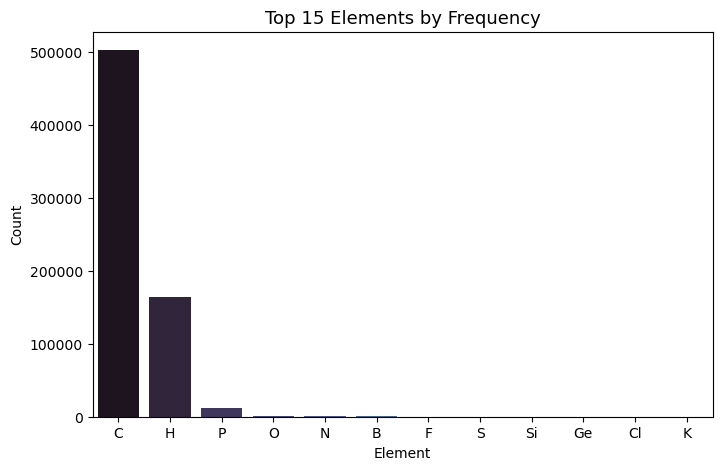

element
C     502095
H     163381
P      11457
O        644
N        514
B        340
F        251
S         45
Si        37
Ge         6
Cl         4
K          1
Name: count, dtype: int64

In [3]:
display(Markdown("##  Element Distribution"))

element_counts = assigns['element'].value_counts().head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=element_counts.index, y=element_counts.values, palette='mako')
plt.title("Top 15 Elements by Frequency", fontsize=13)
plt.ylabel("Count")
plt.xlabel("Element")
plt.show()

display(element_counts)


## Temperature and Solvent Distribution

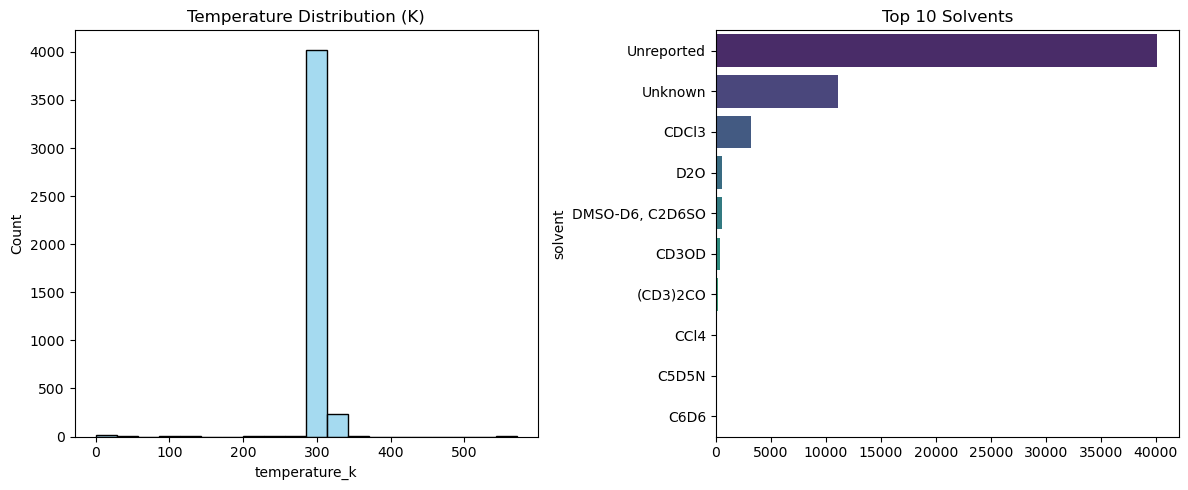

### 🔹 Solvent Frequency Table

solvent
Unreported         40074
Unknown            11135
CDCl3               3230
D2O                  586
DMSO-D6, C2D6SO      520
CD3OD                383
(CD3)2CO             186
CCl4                 140
C5D5N                101
C6D6                  96
Name: count, dtype: int64

In [4]:
display(Markdown("## Temperature and Solvent Distribution"))

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(mols['temperature_k'].dropna(), bins=20, ax=axes[0], color='skyblue')
axes[0].set_title("Temperature Distribution (K)")

top_solvents = mols['solvent'].value_counts().head(10)
sns.barplot(x=top_solvents.values, y=top_solvents.index, ax=axes[1], palette='viridis')
axes[1].set_title("Top 10 Solvents")

plt.tight_layout()
plt.show()

display(Markdown("### 🔹 Solvent Frequency Table"))
display(top_solvents)


##  NMR Shift Distribution (ppm)

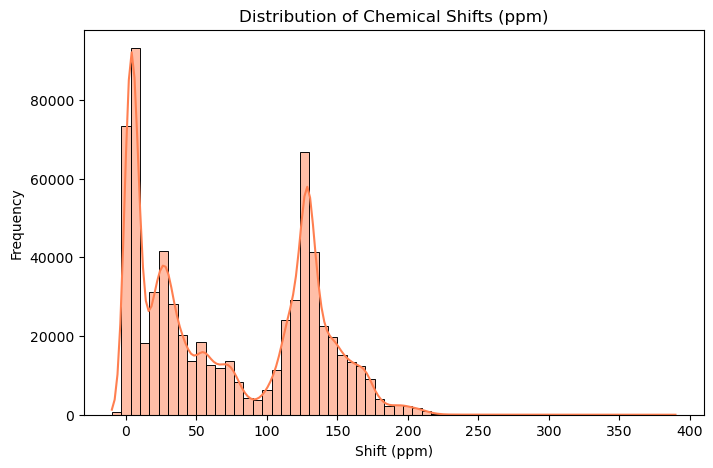

Min shift: -10.00 ppm, Max shift: 389.80 ppm


In [5]:
display(Markdown("##  NMR Shift Distribution (ppm)"))

plt.figure(figsize=(8,5))
sns.histplot(assigns['shift_ppm'], bins=60, kde=True, color='coral')
plt.title("Distribution of Chemical Shifts (ppm)")
plt.xlabel("Shift (ppm)")
plt.ylabel("Frequency")
plt.show()

# Check extreme values
min_shift = assigns['shift_ppm'].min()
max_shift = assigns['shift_ppm'].max()
print(f"Min shift: {min_shift:.2f} ppm, Max shift: {max_shift:.2f} ppm")


## Relationship Between Atom Count and NMR Shifts

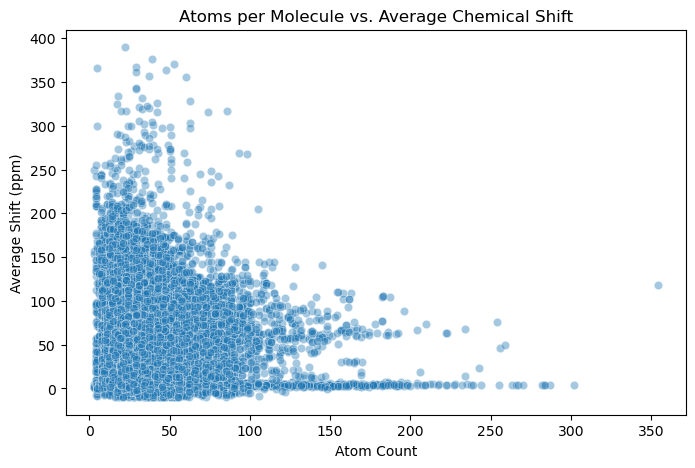

Correlation between atom count and average shift: -0.282


In [6]:
display(Markdown("## Relationship Between Atom Count and NMR Shifts"))

# Calculate average shift per molecule
avg_shift = assigns.groupby('mol_idx')['shift_ppm'].mean().reset_index()
combined = mols.merge(avg_shift, on='mol_idx', how='inner')

plt.figure(figsize=(8,5))
sns.scatterplot(x=combined['n_atoms'], y=combined['shift_ppm'], alpha=0.4)
plt.title("Atoms per Molecule vs. Average Chemical Shift")
plt.xlabel("Atom Count")
plt.ylabel("Average Shift (ppm)")
plt.show()

corr = combined[['n_atoms', 'shift_ppm']].corr().iloc[0,1]
print(f"Correlation between atom count and average shift: {corr:.3f}")


##  Correlation Heatmap (Numerical Variables)

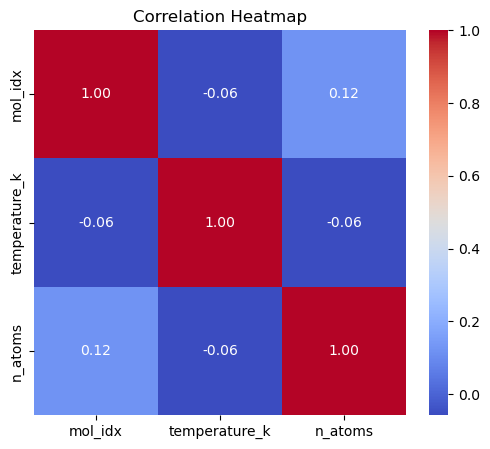

In [7]:
display(Markdown("##  Correlation Heatmap (Numerical Variables)"))

num_cols = mols.select_dtypes(include=np.number)
plt.figure(figsize=(6,5))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
eda_summary = {
    "molecules_total": len(mols),
    "assignments_total": len(assigns),
    "unique_solvents": int(mols['solvent'].nunique()),
    "avg_atoms_per_molecule": round(mols['n_atoms'].mean(), 2),
    "avg_shift_ppm": round(assigns['shift_ppm'].mean(), 2),
    "min_shift_ppm": round(assigns['shift_ppm'].min(), 2),
    "max_shift_ppm": round(assigns['shift_ppm'].max(), 2)
}

with open(REPORTS / "eda_summary.json", "w") as f:
    json.dump(eda_summary, f, indent=2)

display(Markdown("## EDA Summary Report"))
display(pd.DataFrame([eda_summary]))
print(f"Saved EDA summary to {REPORTS / 'eda_summary.json'}")


## EDA Summary Report

,molecules_total,assignments_total,unique_solvents,avg_atoms_per_molecule,avg_shift_ppm,min_shift_ppm,max_shift_ppm
0,61215,678775,88,34.05,72.1,-10.0,389.8


Saved EDA summary to C:\DOCTORAL HUB\nmr_pipeline_project\data\reports\eda_summary.json


In [9]:
plt.savefig(REPORTS / "plot_name.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>